# Predicting heart disease using machine learning
this notebook looks into using python-based machine learning and data science libraries in an attempt to build a machine leatning model capable of prediction if someone had heart disease based in their medical attributes.

We will take the following approach:
 1. Problem definition
 2. Data
 3. Evaluation
 4. Features
 5. Modeling
 6. Experimentation

## 1. Problem Definition

in a statement,
> Given clinical parameters of patients, can we predict if they have heart disease?

## 2. Data
The original data is by the uci cleveland data from uci machine learning repository

## 3. Evaluation

 > if we can reach 95% accuracy wheather or not a patient has heart disease dirung the proof of the concept, we'll pursue the project.
 
 ## 4. Features
  
 This is where you'll get different information about each of the features of the data.
 
 **Create Data Ditionary**
 
 * id (Unique id for each patient)
 * age (Age of the patient in years)
 * origin (place of study)
 * sex (Male/Female)
 * cp = chest pain type ([0=typical angina, 1=atypical angina, 2=non-anginal, 3=asymptomatic])
 * trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
 * chol (serum cholesterol in mg/dl)
 * fbs (if fasting blood sugar > 120 mg/dl)
 * restecg (resting electrocardiographic results)
   -- Values: [normal, stt abnormality, lv hypertrophy]
 * thalach: maximum heart rate achieved
 * exang: exercise-induced angina (True/ False)
 * oldpeak: ST depression induced by exercise relative to rest
 * slope: the slope of the peak exercise ST segment
 * ca: number of major vessels (0-3) colored by fluoroscopy
 * thal: [normal; fixed defect; reversible defect]
 * num: the predicted attribute


## Preparing the tools

we're going to use pandas, matplotlib and NumPy for data analysis and manipulation.

 

In [1]:
#import all the tools we need

#Regular EDA ( exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plot appear inside the notebook
%matplotlib inline
# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## Data exploration (EDA) exploratory data analysis

know more about the data and become a subject matter expert.

 1. What questions are you trying to answer?
 2. what kind of data do we have and how do we treat different types?
 3. what's missing from the data and how do you deal with it?
 4. where are the outliers and why should you care about it?
 5. How can you add, change or remove features to get more out of our data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let's find the number of classes in the data

df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

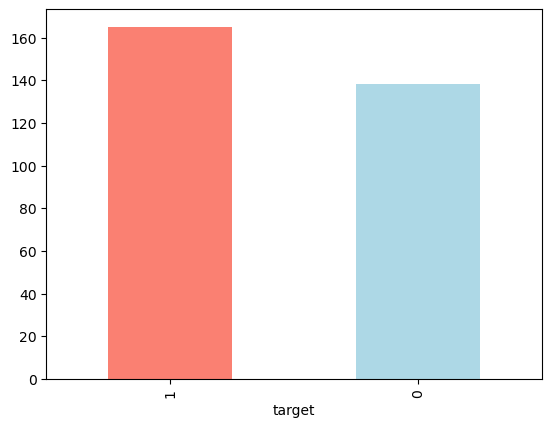

In [5]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are there any missing values? 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
#comparing target column with the sex column

pd.crosstab(df.target, df.sex)



sex,0,1
target,,
0,24,114
1,72,93


the result can ensure that for every random patient, if the patient is female, 
the heart disease chance is 72/96 and that for a male is 93/207

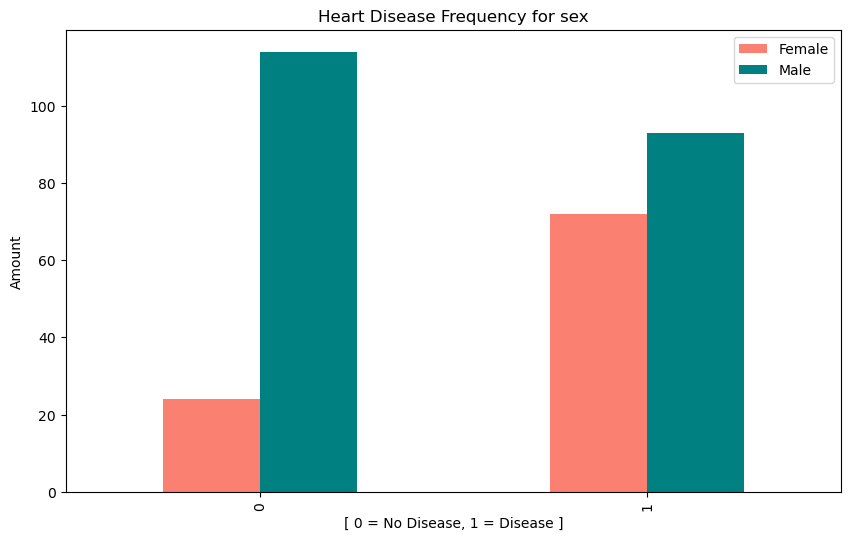

In [12]:
#create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize= (10,6),
                                   color = ["salmon", "teal"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("[ 0 = No Disease, 1 = Disease ]")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

In [13]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs Max Heart Rate for heart disease

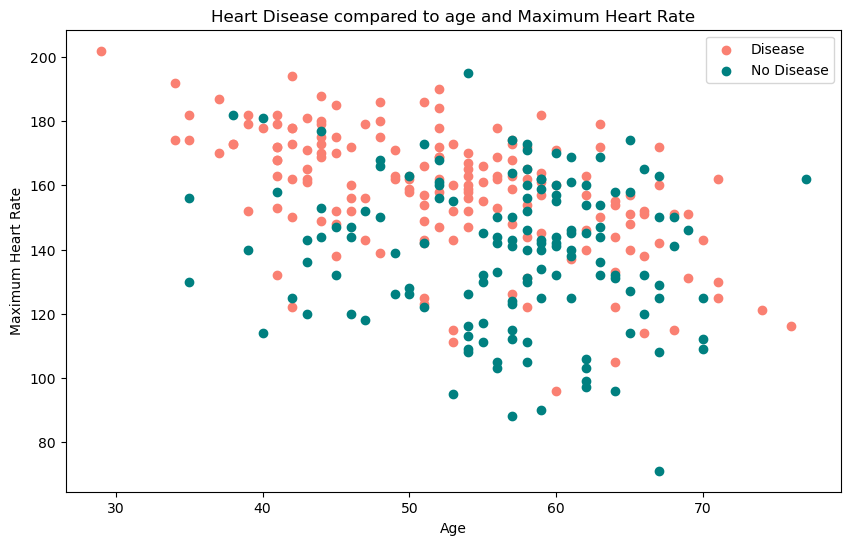

In [14]:
#create another figure

plt.figure(figsize=(10,6))

#scatter with positive examples

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon")

#scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="teal");

#add helpful info
plt.title("Heart Disease compared to age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease","No Disease"]);

Text(0.5, 0, 'Age')

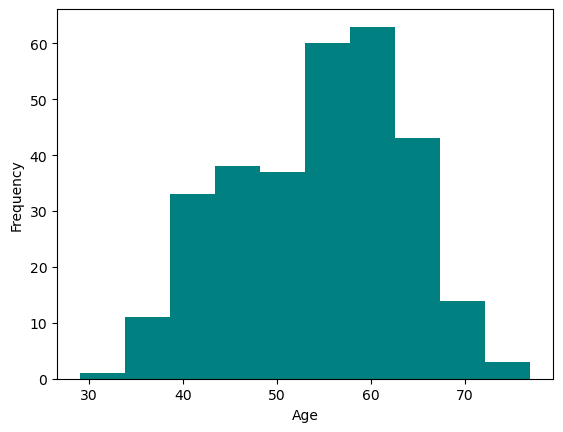

In [15]:
#cheking the age distribution or spread of the data in histogram

df.age.plot.hist(color="teal");
plt.xlabel("Age")

### Heart Disease Frequency per chest pain type

cp = chest pain type ([0=typical angina, 1=atypical angina, 2=non-anginal, 3=asymptomatic])

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


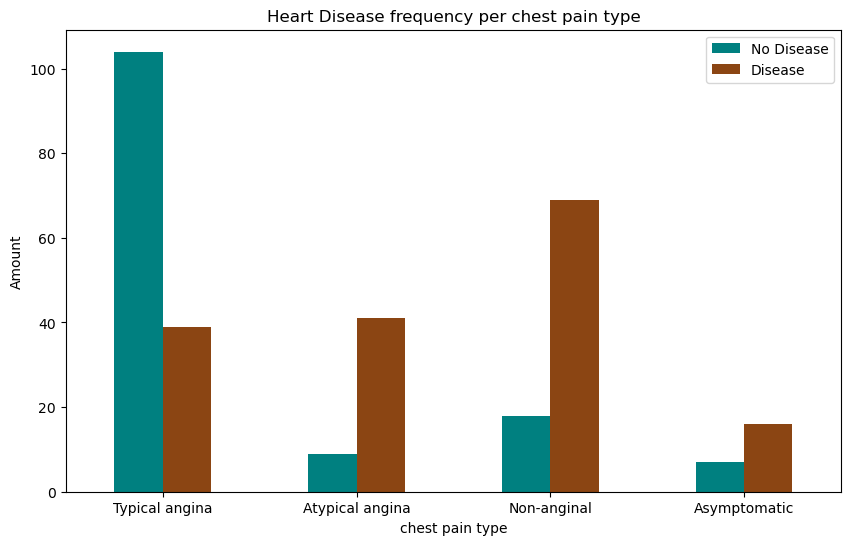

In [17]:
#visualizing the values

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["teal", "saddlebrown"])

labels = ['Typical angina', 'Atypical angina', 'Non-anginal', 'Asymptomatic']
ticks = range(len(labels))
#Adding labels
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(ticks=ticks, labels=labels, rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
#making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


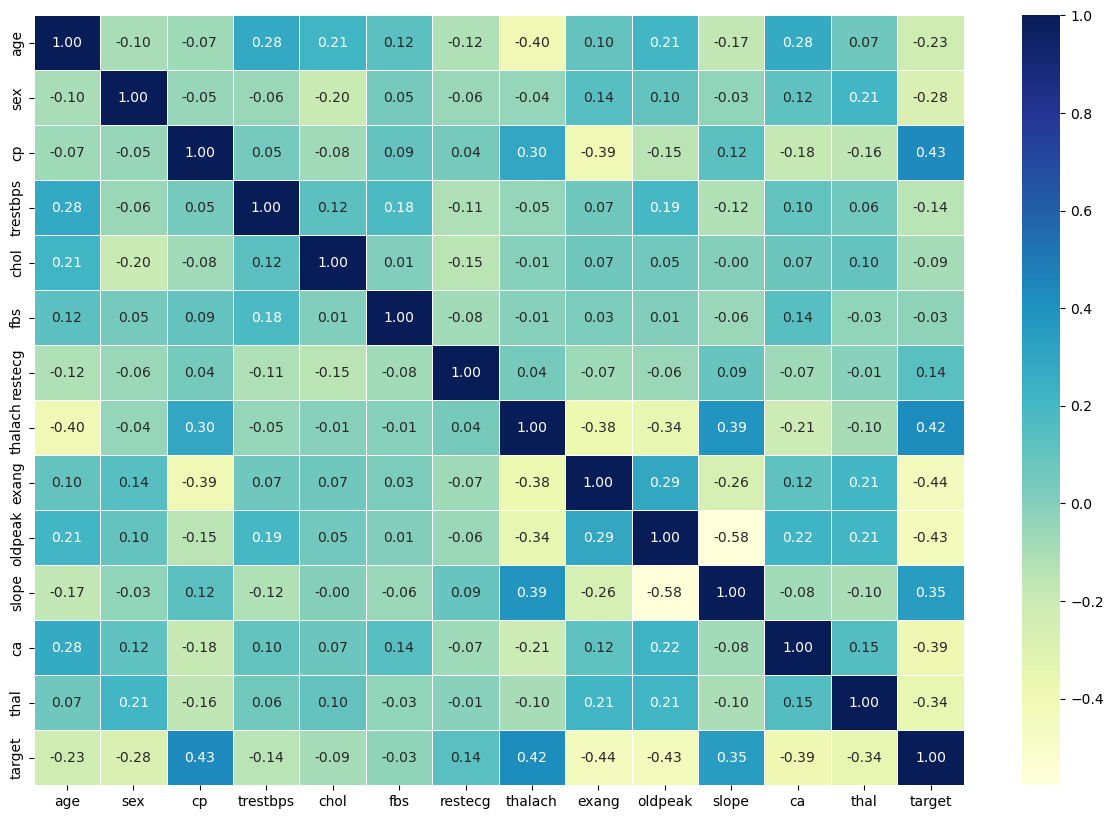

In [20]:
#let's make correlation matrix a little prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")


## 5. Modeling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#split the data to X and Y
X = df.drop("target", axis=1)
y = df.target

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape

(242, 13)

In [27]:
y_test.shape

(61,)

In [28]:
y_train.shape

(242,)

In [29]:
X_test.shape

(61, 13)

Now, data is split. Time to build machine learning model.
we'll train on the training set and test it on our test set.

we'll try 3 diffferent models:

 1. Logistic Regression
 2. k-neighbour classifier
 3. Random Forrest classifier
 
 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
# put models in a dictionary

models= {"logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn ML models
    X_train: training data (no label)
    X_test: test data( no label)
    y_train: train data (labels)
    y_test: test data (labels)
    
    """
    
    #set random seed
    np.random.seed(42)

    #make dictionary to keep model score
    model_scores = {}

    #loop through models
    for name, model in models.items():
        
        #fit the model
        model.fit(X_train, y_train)
        
        #score and append in the score dict.
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.819672131147541}

## Model Comparison

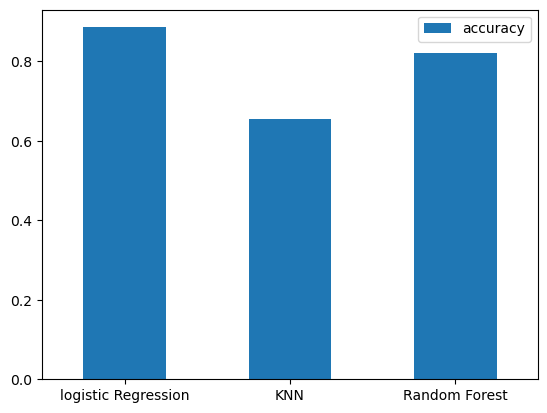

In [33]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);


Now we've got a baseline model. let's improve our model to improve it's accuracy.

Let's look at the following:

 * Hyperparameter tuning
 * Features engineering
 * Confusion Matrix
 * cross-validation
 * Precision
 * Recall
 * F1 score
 * classification report
 * ROC curve
 * Area under the curve (AUC)

### Hyperparameter Tuning

In [34]:
#let's tune the KNN


train_scores = []
test_scores = []

#create a list of different values for n neighbours for knn model tuning

neighbors = range(1, 21)

#setup KNN instance 
knn = KNeighborsClassifier()

#loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #update the test scores list 
    test_scores.append(knn.score(X_test, y_test))
    
    


In [35]:
train_scores

[1.0,
 0.8016528925619835,
 0.7603305785123967,
 0.7644628099173554,
 0.7727272727272727,
 0.7644628099173554,
 0.7024793388429752,
 0.7066115702479339,
 0.7066115702479339,
 0.6859504132231405,
 0.6983471074380165,
 0.6983471074380165,
 0.7024793388429752,
 0.7107438016528925,
 0.6942148760330579,
 0.6818181818181818,
 0.6942148760330579,
 0.6735537190082644,
 0.6735537190082644,
 0.6942148760330579]

In [36]:
test_scores

[0.5573770491803278,
 0.4918032786885246,
 0.6229508196721312,
 0.6065573770491803,
 0.6557377049180327,
 0.6885245901639344,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853]

Maximum KNN score on the test data: 73.77 %


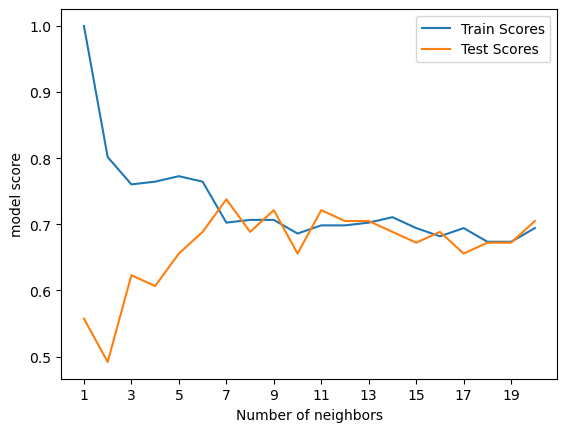

In [37]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1, 21, 2))
plt.xlabel("Number of neighbors")
plt.ylabel("model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f} %")

Even with the Hyperparameter tuning, KNN still performs lower than the other two models.

Let's Try tune the other two models using RandomizedSearchCV

## Hyperparameter tuning using the RandomizedSearchCv
we're going to tune:

* LogisticRegression()
* RandomForestClassifier()

    ...using RandomizedSearchCV

In [38]:
# create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}



Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [39]:
#Tune LogisticRegression
np.random.seed(42)


#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

In [41]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Now Let's tune the RandomForestClassifier

In [42]:
# setup random seed
np.random.seed(42)

#setup random Hypermeter search for the RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#Fit RandomForestClassifier search model for RandomForestClassifier

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
#find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
rs_rf.score(X_test, y_test)

0.8688524590163934

# Tuning methods:

1. By hand
2. RandomizedSearchCV
3. GridsearchCV

## Hyperparameter Tuning Using the GridSearchCV
since our LogisticRegression Model provides the best score so far, we'll try and impeove them again usinf the GridsearchCV...

In [45]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

#setup grid parameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#for grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [46]:
#check for the best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [47]:
#evaluate the LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier beyond accuracy 

 * Roc Curve and AUC Score
 * Confusion matrix
 * classification report
 * precision
 * Recall
 * F1-score
 
 ... it would be great if cross-validation was used where possible.
 
 To make comparisonds and evaluate our trained model, first we need to make predictions.
 


In [48]:
# Make predictions with the tned model

y_preds = gs_log_reg.predict(X_test)


In [49]:
y_preds

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [50]:
y_test

260    0
187    0
128    1
252    0
295    0
      ..
71     1
91     1
283    0
288    0
130    1
Name: target, Length: 61, dtype: int64

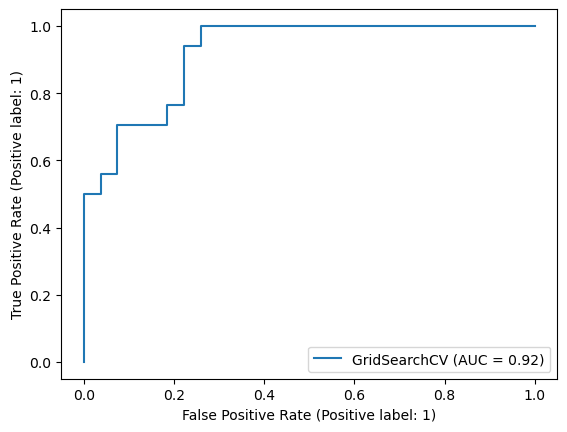

In [51]:
# plot ROC curve and calculate the AUC metric

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)


In [52]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[20  7]
 [ 0 34]]


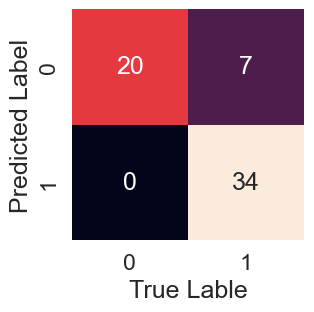

In [53]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    plots a nice looking confusion matric using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    
    plt.xlabel("True Lable")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC Curve , an AUC score and a confusion matrix, let's get a classification report,  as well as cross-validated precision, recall and f1-score.

In [137]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## calculate evaluation metrics using cross-validation

we're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using 

 `cross_val_score()`|
 




In [138]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [140]:
#create a new classifirer with the best parameters 
clf = LogisticRegression(C=0.20433597178569418,
                        solver = 'liblinear')

In [160]:
 # cross-validadet accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [159]:
#cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [161]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [162]:
#cross-validtaed f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "f1")

cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrics'}>

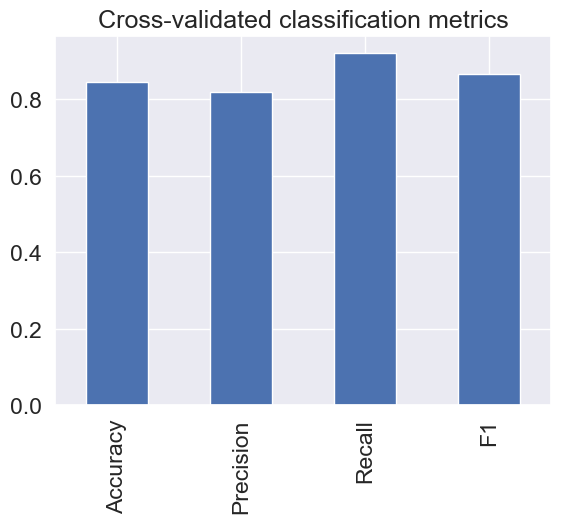

In [168]:
#visualize the cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])


cv_metrics.T.plot(kind="bar", title="Cross-validated classification metrics", legend=False)

## Feature importance

Feature importance is another as asking, "which features contributed most to the ourcomes of the model and how did they contribute?"


finding feature importance is difference for each machine learning model.


In [171]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [172]:
# fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                        solver = 'liblinear')

clf.fit(X_train, y_train);

In [173]:
#check coef_

clf.coef_


array([[ 0.01292621, -0.94946731,  0.63718935, -0.01707551, -0.00187432,
         0.03759253,  0.37569901,  0.02854281, -0.62719163, -0.51017525,
         0.20836579, -0.54670737, -0.65915469]])

In [178]:
#match coef's of features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.012926211421392903,
 'sex': -0.9494673122844155,
 'cp': 0.6371893488511553,
 'trestbps': -0.01707550900335146,
 'chol': -0.001874317731736082,
 'fbs': 0.03759253266495229,
 'restecg': 0.3756990094459645,
 'thalach': 0.028542814143730916,
 'exang': -0.6271916301266375,
 'oldpeak': -0.5101752484490298,
 'slope': 0.2083657927232743,
 'ca': -0.5467073732628333,
 'thal': -0.6591546946650219}

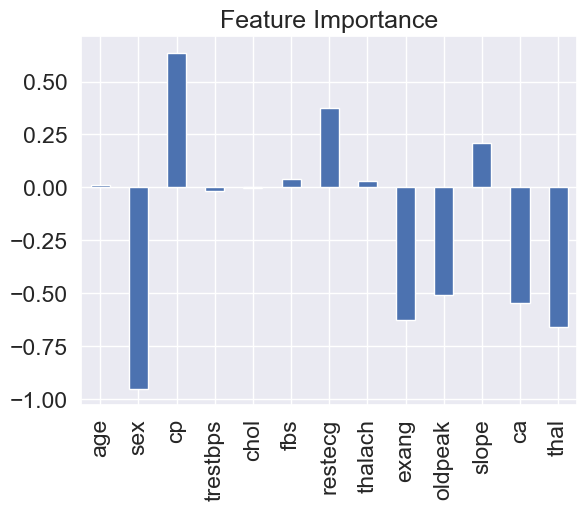

In [180]:
#visualization of the feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);


In [181]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [182]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experimentation

if you haven't hot your evaluation metric yet... ask yourself...

* could you collect more data ?
* could you try a better model ? like catboost or XGBoost?
* could we improve the current model beyond we've done so far?
* If your model is good enough ( you have hit yoour evaluation metric)
* How do you save and share it ?